# Comparing CPU to GPU calculation

In [1]:
from signalsnap import SpectrumCalculator, SpectrumConfig
import numpy as np
rng = np.random.default_rng()

For large windows it can be significantly faster to perform the calculation of the spectra on a GPU (here tested on an AMD 5300M). The backend can be set by setting the backend parameter in the `calc_spec` methods to 'cpu', 'opencl' (for AMD CPUS) , or 'cuda' (for Nvidia GPUs). Below is a comparison of the calculation time. Be sure to perform multiple timing runs, since code is compiled at first runtime.

In [11]:
# ------ Generation of white noise -----
unit = 'Hz'
fs = 10e3 # sampling rate
N = 1e6 # number of points
t = np.arange(N) / fs
y = rng.normal(scale=1, size=t.shape)
print(y)

[ 0.56804333  0.56543867 -0.00785534 ... -0.67120519 -0.19806725
 -0.28840224]


In [14]:
config = SpectrumConfig(data=y, delta_t=1/fs, f_unit='kHz',
                        spectrum_size=1000, order_in='all', 
                        f_max=5e3, backend='cpu')

spec = SpectrumCalculator(config)

Actual T_window: 0.2
Maximum frequency: 5000.0
Number of points: 1001


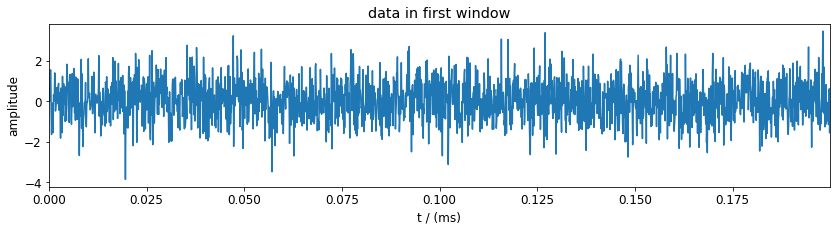

chunk shape:  2000
CPU times: user 5min 15s, sys: 58.4 s, total: 6min 14s
Wall time: 2min 11s


In [15]:
%%time
f, s, serr = spec.calc_spec()

In [ ]:
config = SpectrumConfig(data=y, delta_t=1/fs, f_unit='kHz',
                        spectrum_size=1000, order_in='all', 
                        f_max=5e3, backend='opencl')

spec = SpectrumCalculator(config)

In [16]:
%%time
f, s, serr = spec.calc_spec()

Actual T_window: 0.2
Maximum frequency: 5000.0
Number of points: 1001


chunk shape:  2000
CPU times: user 2.26 s, sys: 2.42 s, total: 4.68 s
Wall time: 10.4 s
